<div align="center"> <b> Mid-term project </b></div>
<div align="center"> <b> Промежуточный проект </b></div>

In [208]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [209]:
customers=pd.read_csv('/Users/dmitry/Downloads/olist_customers_dataset.csv')
orders=pd.read_csv('/Users/dmitry/Downloads/olist_orders_dataset.csv')
order_items=pd.read_csv('/Users/dmitry/Downloads/olist_order_items_dataset.csv')

## Pre-work 

Let's have a look at all 3 dataframes <br>
Посмотрим на все 3 датафрейма

**customers** - таблица с уникальными идентификаторами пользователей

In [210]:
customers.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


**customer_id** — позаказный идентификатор пользователя <br>
**customer_unique_id** —  уникальный идентификатор пользователя  (аналог номера паспорта)<br>
**customer_zip_code_prefix** —  почтовый индекс пользователя<br>
**customer_city** —  город доставки пользователя<br>
**customer_state** —  штат доставки пользователя<br>

In [211]:
customers.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

**orders** - таблица заказов

In [212]:
orders.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


**order_id** —  уникальный идентификатор заказа (номер чека) <br>
**customer_id** —  позаказный идентификатор пользователя <br>
**order_status** —  статус заказа <br>
**order_purchase_timestamp** —  время создания заказа<br>
**order_approved_at** —  время подтверждения оплаты заказа<br>
**order_delivered_carrier_date** —  время передачи заказа в логистическую службу<br>
**order_delivered_customer_date** —  время доставки заказа<br>
**order_estimated_delivery_date** —  обещанная дата доставки<br>

Column names are too long - let's drop "order_" from (supposed) datetime columns <br>
Названия некоторых столбцов слишком длинные - уберем "order_" из них

In [213]:
old_names=orders.columns.to_list()
new_names=[]
for i in old_names:
    if (i!='order_id') & (i!='order_status'):
        new_names.append(i.replace('order_',''))
    else:
        new_names.append(i)
orders=orders.rename(columns=dict(zip(old_names,new_names)))

In [214]:
orders.dtypes

order_id                   object
customer_id                object
order_status               object
purchase_timestamp         object
approved_at                object
delivered_carrier_date     object
delivered_customer_date    object
estimated_delivery_date    object
dtype: object

Let's change all datetimes to datetime format to avoid doing it later <br>
Сразу переведем временные столбцы в datetime формат


In [215]:
orders['purchase_timestamp']=pd.to_datetime(orders['purchase_timestamp'])
orders['approved_at']=pd.to_datetime(orders['approved_at'])
orders['delivered_carrier_date']=pd.to_datetime(orders['delivered_carrier_date'])
orders['delivered_customer_date']=pd.to_datetime(orders['delivered_customer_date'])
orders['estimated_delivery_date']=pd.to_datetime(orders['estimated_delivery_date'])

Let's check if everything has worked out <br>
Проверим,что все сработало

In [216]:
orders.dtypes

order_id                           object
customer_id                        object
order_status                       object
purchase_timestamp         datetime64[ns]
approved_at                datetime64[ns]
delivered_carrier_date     datetime64[ns]
delivered_customer_date    datetime64[ns]
estimated_delivery_date    datetime64[ns]
dtype: object

**order_items** - товарные позиции, входящие в заказы

In [217]:
order_items.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


**order_id** —  уникальный идентификатор заказа (номер чека) <br>
**order_item_id** —  идентификатор товара внутри одного заказа<br>
**product_id** —  ид товара (аналог штрихкода)<br>
**seller_id** — ид производителя товара<br>
**shipping_limit_date** —  максимальная дата доставки продавцом для передачи заказа партнеру по логистике<br>
**price** —  цена за единицу товара<br>
**freight_value** —  вес товара<br>

In [218]:
order_items.dtypes

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

In [219]:
order_items['shipping_limit_date']=pd.to_datetime(order_items['shipping_limit_date'])

Let's have a look at unique orders' statuses <br>
Посмотрим на уникальные статусы заказов

In [220]:
orders['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

**created** —  создан <br>
**approved** —  подтверждён<br>
**invoiced** —  выставлен счёт<br>
**processing** —  в процессе сборки заказа<br>
**shipped** —  отгружен со склада<br>
**delivered** —  доставлен пользователю<br>
**unavailable** —  недоступен<br>
**canceled** —  отменён (assuming it was canceled by the customer)<br>

Let's look in order dataframe by order status:<br>
Посмотрим в датафрейм order, сгруппировав его по order status:

In [221]:
orders.groupby(['order_status']).count()

,order_id,customer_id,purchase_timestamp,approved_at,delivered_carrier_date,delivered_customer_date,estimated_delivery_date
order_status,,,,,,,
approved,2,2,2,2,0,0,2
canceled,625,625,625,484,75,6,625
created,5,5,5,0,0,0,5
delivered,96478,96478,96478,96464,96476,96470,96478
invoiced,314,314,314,314,0,0,314
processing,301,301,301,301,0,0,301
shipped,1107,1107,1107,1107,1107,0,1107
unavailable,609,609,609,609,0,0,609


**We notice that:**
1) There are 6 delivered orders with status "canceled" <br>
2) There are 96478 purchases entries with status "delivered", out are 96464 approved orders, but 96476 were delivered to carrier and 96470 were delivered orders <br>
<br>
**6, 14 non-approved delivered orders, and 8 delivered but without delivered_customer_date  should be checked separately and for now should be considered as bugged - we can't include them in further calculations**

**Замечаем**:<br>
1) 6 доставленных заказов имеют статус "canceled" <br>
2) Всего 96748 покупок со статусом "delivered", но только 96464 из них "approved", но 96476 было доставлено в курьерскую службу, а 96470 было доставлено заказчику <br>
<br>
**6,14 не подтвержденных заказов было доставлено, 8 доставленных, но без даты доставки должны быть проверены отдельно, в данный момент мы можем считать их багнутыми - не можем включать в дальнейшие расчеты**

Let's exlcude them below:<br>
Исключим их ниже:

In [222]:
canceled_bugged=orders[orders['delivered_customer_date'].notna()].\
                query('order_status=="canceled"')\
                ['order_id'].to_frame()
delivered_not_approved_bugged=orders[orders['approved_at'].isna()].\
                query('order_status=="delivered"')\
                ['order_id'].to_frame()
delivered_wo_customer_bugged=orders[orders['delivered_customer_date'].isna()].\
                query('order_status=="delivered"')\
                ['order_id'].to_frame()

In [223]:
bugged_list=list(pd.concat([canceled_bugged, 
                       delivered_not_approved_bugged, 
                       delivered_wo_customer_bugged])['order_id'].unique())

In [224]:
bugged_list

['1950d777989f6a877539f53795b4c3c3',
 'dabf2b0e35b423f94618bf965fcb7514',
 '770d331c84e5b214bd9dc70a10b829d0',
 '8beb59392e21af5eb9547ae1a9938d06',
 '65d1e226dfaeb8cdc42f665422522d14',
 '2c45c33d2f9cb8ff8b1c86cc28c11c30',
 'e04abd8149ef81b95221e88f6ed9ab6a',
 '8a9adc69528e1001fc68dd0aaebbb54a',
 '7013bcfc1c97fe719a7b5e05e61c12db',
 '5cf925b116421afa85ee25e99b4c34fb',
 '12a95a3c06dbaec84bcfb0e2da5d228a',
 'c1d4211b3dae76144deccd6c74144a88',
 'd69e5d356402adc8cf17e08b5033acfb',
 'd77031d6a3c8a52f019764e68f211c69',
 '7002a78c79c519ac54022d4f8a65e6e8',
 '2eecb0d85f281280f79fa00f9cec1a95',
 '51eb2eebd5d76a24625b31c33dd41449',
 '88083e8f64d95b932164187484d90212',
 '3c0b8706b065f9919d0505d3b3343881',
 '2babbb4b15e6d2dfe95e2de765c97bce',
 '2d1e2d5bf4dc7227b3bfebb81328c15f',
 'f5dd62b788049ad9fc0526e3ad11a097',
 '2ebdfc4f15f23b91474edf87475f108e',
 'e69f75a717d64fc5ecdfae42b2e8e086',
 '0d3268bad9b086af767785e3f0fc0133',
 '2d858f451373b04fb5c984a1cc2defaf',
 'ab7c89dc1bf4a1ead9d6ec1ec8968a84',
 

The list above should be observed separately to understand reasons for bugs<br>
Стоит рассмотреть эти заказы отдельно, чтобы понять причину багов

In [225]:
orders=orders.query('order_id  not in @bugged_list')

**We consider a purchase an order with non-zero purchase_timestamp, not with the status "canceled", "unavailable", and not in the "bugged list"** <br>
**Будем считать покупкой заказ с ненулевой датой покупки, не в статусе "canceled","unavailable" и не в "багнутом листе"**

In [226]:
purchase=orders.copy()
purchase=purchase.query('order_status!="canceled" & order_status!="unavailable"')

In [227]:
purchase.groupby(['order_status']).count()

,order_id,customer_id,purchase_timestamp,approved_at,delivered_carrier_date,delivered_customer_date,estimated_delivery_date
order_status,,,,,,,
approved,2,2,2,2,0,0,2
created,5,5,5,0,0,0,5
delivered,96456,96456,96456,96456,96455,96456,96456
invoiced,314,314,314,314,0,0,314
processing,301,301,301,301,0,0,301
shipped,1107,1107,1107,1107,1107,0,1107


We see the funnel stabilize in purchase_timestamp & approved_at. So far these orders have not been canceled, set to unavailable - we consider them as purchase<br>
Замечаем стабилизацию воронки по столбцам purchase_timestamp и approved_at. Эти заказы пока не были отменены или переведены в статус "unavailable" - мы считаем их покупкой


## Question 1

**Question 1** <br>
How many users have made only 1 Purchase? <br>
<br>
**Вопрос 1** <br>
Сколько у нас пользователей, которые совершили покупку только один раз? <br>

Присоединим к заказам уникальные номера заказчиков:

In [228]:
purchase_q1=purchase.merge(customers.drop(['customer_zip_code_prefix',
                                                       'customer_city',
                                                       'customer_state'], axis=1),
                                        left_on='customer_id', right_on='customer_id')
print(purchase_q1.shape)
purchase_q1_count=purchase_q1.groupby(['customer_unique_id'],as_index=False).count()

(98185, 9)


Let's visualize it<br>
Визуализируем<br>

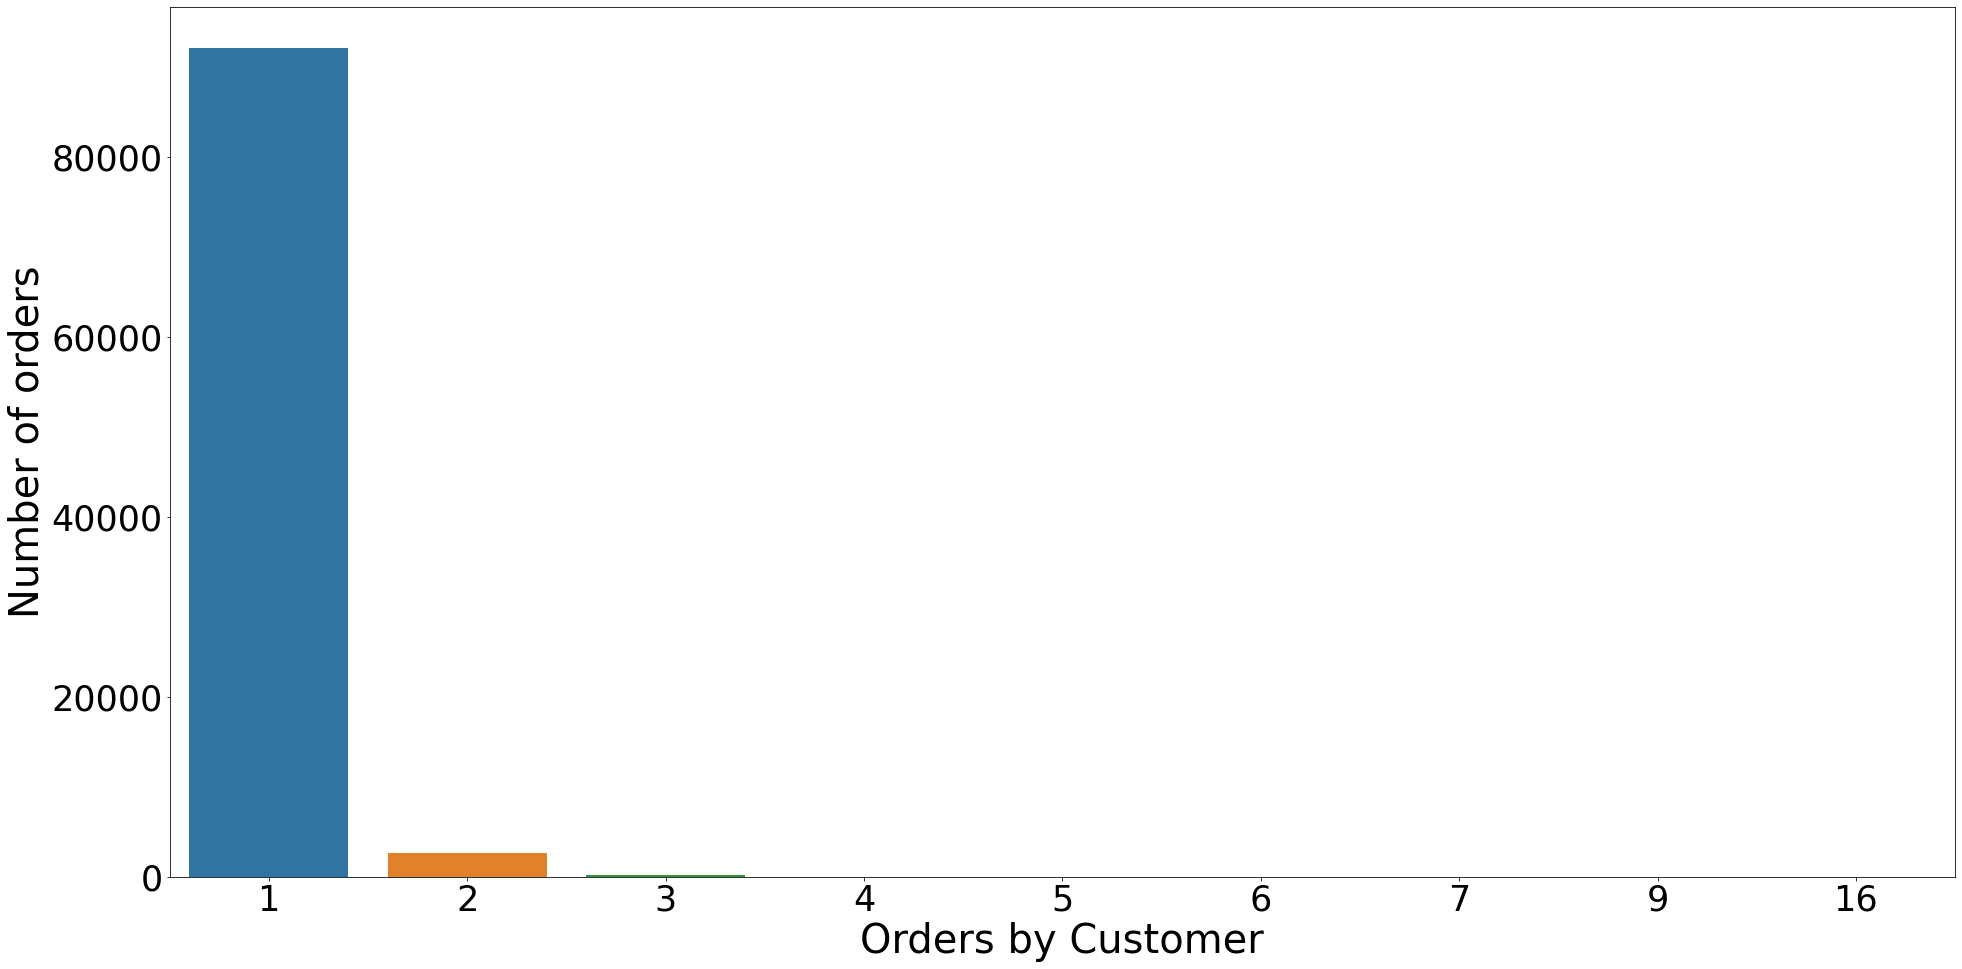

In [229]:
plt.figure(figsize=(32,16))
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
sns.countplot(x='order_id', data=purchase_q1_count)
plt.xlabel('Orders by Customer', fontsize=40)
plt.ylabel('Number of orders', fontsize=40)
plt.show()

## Answer to Question 1
## Ответ на Вопрос 1

In [230]:
print('Number of users with 1 purchase: {}'.
        format(purchase_q1_count.query('order_id==1').shape[0]))
print('Число пользователей, совершивших 1 покупку: {}'.
        format(purchase_q1_count.query('order_id==1').shape[0]))

Number of users with 1 purchase: 92082
Число пользователей, совершивших 1 покупку: 92082


## Question 2 

**Question 2**<br>
How many orders are not delivered in a month on average due to different reasons?<br>
(show reasons' detalization)<br>
<br>**Вопрос 2**<br>
Сколько заказов в месяц в среднем не доставляется по разным причинам<br>
(вывести детализацию по причинам)?<br>
**------------------------------------------------------------------------------------------------------------------------------**

Most important is to define what is not delivered order. <br>
**We will assume that not delivered order is the one which will not be delivered for sure. <br>
If we ask a question "Has the order not been delivered for sure?", the answer should be "yes".**
<br>
<br>Самое важное - определить, что считается "недоставленный заказ"
**Будем считать, что недоставленный заказ это тот, который точно не будет доставлен (CAP!)**<br>
**Если мы зададим вопрос - "Заказ точно не был доставлен?", ответ должен быть "да"**

Под определение выше подходят заказы в статусе "unavailable" и "canceled"

In [259]:
orders_q2=orders.copy()

In [260]:
orders_q2.head(2)

,order_id,customer_id,order_status,purchase_timestamp,approved_at,delivered_carrier_date,delivered_customer_date,estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13


**Step 1:** get "unavailable" and "canceled" orders<br>
**Шаг 1:** достанем "unavailable" и "canceled" заказы 

In [261]:
unavailable_canceled=orders_q2.query('order_status=="canceled" | order_status=="unavailable"')

Наиболее корректной будем считать "estimated_delivery_date" для расчета недоставленных заказов в месяц, так как это наша лучшая оценка того, в какой месяц (когда) товар должен быть доставлен

**Step 2:** groupby by month of estimate_delivery_date, count number by month-status and calculate mean<br>
**Шаг 2:** сгуппируем по месяцам, рассчитаем число по месяцам-статусу и рассчитаем среднее <br>

In [262]:
unavailable_canceled['month-year']=unavailable_canceled['estimated_delivery_date'].dt.to_period('m')

/Users/dmitry/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [263]:
unavailable_canceled.head(2)

,order_id,customer_id,order_status,purchase_timestamp,approved_at,delivered_carrier_date,delivered_customer_date,estimated_delivery_date,month-year
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05,2017-12
397,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,canceled,2018-08-04 14:29:27,2018-08-07 04:10:26,NaT,NaT,2018-08-14,2018-08


In [270]:
by_month=unavailable_canceled.groupby(['month-year','order_status'], \
                                      as_index=False).count()\
[['month-year','order_status','order_id']].rename(columns={'order_id':'not_delivered'})
by_month.head(3)

,month-year,order_status,not_delivered
0,2016-09,canceled,1
1,2016-10,canceled,3
2,2016-11,canceled,10


## Answer to Question 2
## Ответ на Вопрос 2

In [272]:
by_month.groupby(['order_status']).mean().round(2)

,not_delivered
order_status,
canceled,23.81
unavailable,29.00


## Question 3


For each product display in which weekday it is mostly bought?<br>
По каждому товару определить, в какой день недели товар чаще всего покупается?<br>

**We will assume orders from table "purchase" as purchased.** <br>
Weekday will be taken from the purchase_timestamp date (as there is no funnel between purchase_timestamp and approved_timestamp)<br>
**Step 1:** Let's append weekday<br>
**Step 2:** Merge order_items (initial dataframe) and dataframe from Step 1 <br>
**Step 3:** Group orders by product_id and filter by max <br>
**Step 4:** Implode by weekday<br>
<br>
**Будем работать с заказами из таблицы "purchase"**<br>
День недели будем брать из purchase_timestamp_date<br>
**Шаг 1:** аппендим день недели <br>
**Шаг 2:** смерджим order_items (первоначальный датафрейм) и датафрейм из шага 1 <br>
**Шаг 3:** сгруппируем ордера по product_id и возьмем максимальное значение<br?
**Шаг 4:** сделаем имплоуд по дню недели

In [273]:
purchase_q3=purchase.copy()
purchase_q3=purchase_q3[['order_id','purchase_timestamp']]
purchase_q3.head(2)

,order_id,purchase_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37


**Step 1:** <br>
**Шаг 1:**

In [274]:
purchase_q3['weekday']=purchase_q3['purchase_timestamp'].dt.day_name()

In [275]:
purchase_q3.head(2)

,order_id,purchase_timestamp,weekday
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,Monday
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,Tuesday


**Step 2:** <br>
**Шаг 2:**

In [276]:
purchase_q3_by_weekday=purchase_q3.merge(order_items, left_on='order_id',
                                                             right_on='order_id',
                                                             how='inner')

In [278]:
purchase_q3_by_weekday.head(2)

,order_id,purchase_timestamp,weekday,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,Monday,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,Tuesday,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76


In [279]:
product_by_weekday_q3=purchase_q3_by_weekday.\
                groupby(['product_id','weekday'],as_index=False).count().\
                sort_values(['product_id'],ascending=False)
product_by_weekday_q3.head(2)

,product_id,weekday,order_id,purchase_timestamp,order_item_id,seller_id,shipping_limit_date,price,freight_value
60876,fffe9eeff12fcbd74a2f2b007dde0c58,Wednesday,1,1,1,1,1,1,1
60875,fffdb2d0ec8d6a61f0a0a0db3f25b441,Tuesday,2,2,2,2,2,2,2


**Step 3:** <br>
**Шаг 3:**

In [280]:
max_product_by_weekday_q3=product_by_weekday_q3.groupby(['product_id'],as_index=False).agg({'order_id':'max'})

In [281]:
max_product_by_weekday_q3.head(2)

,product_id,order_id
0,00066f42aeeb9f3007548bb9d3f33c38,1
1,00088930e925c41fd95ebfe695fd2655,1


In [282]:
product_id_by_weekday_q3=product_by_weekday_q3.merge(max_product_by_weekday_q3, on=('product_id','order_id'))

**Step 4:** <br>
**Шаг 4:**

In [283]:
question_3_answer=product_id_by_weekday_q3.groupby(['product_id'],as_index=False).\
agg({'weekday':lambda x:x.to_list()})

## Answer to Question 3
## Ответ на Вопрос 3

In [284]:
question_3_answer

,product_id,weekday
0,00066f42aeeb9f3007548bb9d3f33c38,[Sunday]
1,00088930e925c41fd95ebfe695fd2655,[Tuesday]
2,0009406fd7479715e4bef61dd91f2462,[Thursday]
3,000b8f95fcb9e0096488278317764d19,"[Wednesday, Friday]"
4,000d9be29b5207b54e86aa1b1ac54872,[Tuesday]
...,...,...
32719,fff6177642830a9a94a0f2cba5e476d1,"[Sunday, Saturday]"
32720,fff81cc3158d2725c0655ab9ba0f712c,[Monday]
32721,fff9553ac224cec9d15d49f5a263411f,[Friday]
32722,fffdb2d0ec8d6a61f0a0a0db3f25b441,[Tuesday]


## Question 4


Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? 

**Step 1:** get month-year column for each entry, number of days in a month <br>
**Step 2:** count orders in a month, aggregate number of days as average <br>
**Step 3:** calculate average for each user <br>
<br>
**Шаг 1:** достанем месяц-год для каждой записи, а так же число дней в этом месяце<br>
**Шаг 2:** посчитаем заказы в месяце, рассчитаем среднее<br>
**Шаг 3:** рассчитаем среднее для каждого пользователя

**Step 1:** <br>
**Шаг 1:** <br>

In [285]:
purchase_q4=purchase.copy()
purchase_q4['month_year']=purchase_q4['purchase_timestamp'].dt.to_period('M')
purchase_q4['days_in_month']=purchase_q4['purchase_timestamp'].dt.daysinmonth
purchase_q4=purchase_q4.merge(customers.drop(['customer_zip_code_prefix',
                                        'customer_city',
                                         'customer_state'], axis=1),
                                        left_on='customer_id', right_on='customer_id')
purchase_q4.head(2)

,order_id,customer_id,order_status,purchase_timestamp,approved_at,delivered_carrier_date,delivered_customer_date,estimated_delivery_date,month_year,days_in_month,customer_unique_id
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10,31,7c396fd4830fd04220f754e42b4e5bff
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018-07,31,af07308b275d755c9edb36a90c618231


**Step 2:** <br>
**Шаг 2:** 

In [289]:
purchases_completed_by_user_month=purchase_q4.\
    groupby(['customer_unique_id','month_year']).\
    agg({'purchase_timestamp':'count','days_in_month':'mean'}).\
    sort_values('purchase_timestamp', ascending=False).\
    rename(columns={'purchase_timestamp':'purchase_quantity'})
purchases_completed_by_user_month['week_factor']=purchases_completed_by_user_month['days_in_month']/7
purchases_completed_by_user_month

,,purchase_quantity,days_in_month,week_factor
customer_unique_id,month_year,,,
12f5d6e1cbf93dafd9dcc19095df0b3d,2017-01,6,31.0,4.428571
b08fab27d47a1eb6deda07bfd965ad43,2017-09,4,30.0,4.285714
3e43e6105506432c953e165fb2acf44c,2018-02,4,28.0,4.000000
83e7958a94bd7f74a9414d8782f87628,2017-01,4,31.0,4.428571
25a560b9a6006157838aab1bdbd68624,2017-04,4,30.0,4.285714
...,...,...,...,...
5596f39d3816bf53e8c25417bb603b92,2017-11,1,30.0,4.285714
5596da0d33997ed7cd9020fa7af0649b,2017-07,1,31.0,4.428571
559620bb304bfa901a54939d04dd203f,2018-01,1,31.0,4.428571


**Step 3:** <br>
**Шаг 3:**

In [287]:
purchases_completed_by_user_month['average_per_week']=purchases_completed_by_user_month['purchase_quantity']/\
purchases_completed_by_user_month['days_in_month']*7

## Answer to Question 4
## Ответ на Вопрос 4

In [288]:
purchases_completed_by_user_month.average_per_week.to_frame().\
sort_values('customer_unique_id',ascending=False)

,,average_per_week
customer_unique_id,month_year,
ffffd2657e2aad2907e67c3e9daecbeb,2017-05,0.225806
ffff5962728ec6157033ef9805bacc48,2018-05,0.225806
ffff371b4d645b6ecea244b27531430a,2017-02,0.250000
fffea47cd6d3cc0a88bd621562a9d061,2017-12,0.225806
fffcf5a5ff07b0908bd4e2dbc735a684,2017-06,0.233333
...,...,...
0004aac84e0df4da2b147fca70cf8255,2017-11,0.233333
0000f6ccb0745a6a4b88665a16c9f078,2017-10,0.225806
0000f46a3911fa3c0805444483337064,2017-03,0.225806


## Question 5


Используя pandas, проведи когортный анализ пользователей. 
В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц.

In [309]:
purchase_q5=purchase.copy()

Let's define the period for which we will caclulate retention period<br>
Определим период для которого будем считать retention

In [310]:
purchase_q5=purchase_q5.merge(customers.drop(['customer_zip_code_prefix',
                                        'customer_city',
                                         'customer_state'], axis=1),
                                        left_on='customer_id', right_on='customer_id')


In [311]:
purchase_q5.head(2)

,order_id,customer_id,order_status,purchase_timestamp,approved_at,delivered_carrier_date,delivered_customer_date,estimated_delivery_date,customer_unique_id
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231


In [312]:
purchase_q5['month_of_first_purchase']=purchase_q5['purchase_timestamp'].dt.to_period('M')
purchase_q5.head(2)

,order_id,customer_id,order_status,purchase_timestamp,approved_at,delivered_carrier_date,delivered_customer_date,estimated_delivery_date,customer_unique_id,month_of_first_purchase
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,2018-07


In [313]:
first_purchase=purchase_q5.groupby(['customer_unique_id'],as_index=False)\
              ['month_of_first_purchase'].min()
first_purchase['key']=1
first_purchase.head(2)

,customer_unique_id,month_of_first_purchase,key
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,1


In [314]:
purchase_q5.sort_values('month_of_first_purchase',ascending=False)\
                               ['month_of_first_purchase'].unique()

<PeriodArray>
['2018-09', '2018-08', '2018-07', '2018-06', '2018-05', '2018-04', '2018-03',
 '2018-02', '2018-01', '2017-12', '2017-11', '2017-10', '2017-09', '2017-08',
 '2017-07', '2017-06', '2017-05', '2017-04', '2017-03', '2017-02', '2017-01',
 '2016-12', '2016-10', '2016-09']
Length: 24, dtype: period[M]

The only year will all 12 months of history is 2017 - we will calculate retention for 2017 only<br>
Все 12 месяцев у нас есть только в данных за 2017 год - возьмем только 2017 для расчета retention

In [315]:
month_list=pd.DataFrame(pd.date_range('2017-01','2017-12', freq='MS')).\
    rename(columns={0:'date'})

In [316]:
month_list['month']=month_list['date'].dt.to_period('M')
month_list['key']=1
month_list=month_list.drop(['date'],axis=1)
month_list

,month,key
0,2017-01,1
1,2017-02,1
2,2017-03,1
3,2017-04,1
4,2017-05,1
5,2017-06,1
6,2017-07,1
7,2017-08,1
8,2017-09,1
9,2017-10,1


Сделаем рыбу:

In [317]:
basis=first_purchase.merge(month_list,left_on='key',right_on='key')

In [318]:
basis=basis[basis['month_of_first_purchase']<=basis['month']]
basis=basis.drop(['key'],axis=1)
basis

,customer_unique_id,month_of_first_purchase,month
26,0000f46a3911fa3c0805444483337064,2017-03,2017-03
27,0000f46a3911fa3c0805444483337064,2017-03,2017-04
28,0000f46a3911fa3c0805444483337064,2017-03,2017-05
29,0000f46a3911fa3c0805444483337064,2017-03,2017-06
30,0000f46a3911fa3c0805444483337064,2017-03,2017-07
...,...,...,...
1139623,ffffd2657e2aad2907e67c3e9daecbeb,2017-05,2017-08
1139624,ffffd2657e2aad2907e67c3e9daecbeb,2017-05,2017-09
1139625,ffffd2657e2aad2907e67c3e9daecbeb,2017-05,2017-10
1139626,ffffd2657e2aad2907e67c3e9daecbeb,2017-05,2017-11


In [301]:
customer_orders=purchase_q5.groupby(['customer_unique_id','month_of_first_purchase'],\
                                    as_index=False).count()\
[['customer_unique_id','month_of_first_purchase','customer_id']]
customer_orders=customer_orders.rename({'month_of_first_purchase':'month'},axis=1)
customer_orders.head(2)

,customer_unique_id,month,customer_id
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,1


Подтянем данные о покупках:

In [302]:
basis_orders=basis.merge(customer_orders, on=['customer_unique_id','month'], how='left')

In [303]:
basis_orders['signum']=(basis_orders['customer_id']>0)*1

In [304]:
basis_orders.head(2)

,customer_unique_id,month_of_first_purchase,month,customer_id,signum
0,0000f46a3911fa3c0805444483337064,2017-03,2017-03,1.0,1
1,0000f46a3911fa3c0805444483337064,2017-03,2017-04,NaN,0


In [305]:
retention=basis_orders.pivot_table(values='signum',
                  index='month_of_first_purchase',
                  columns='month',
                  aggfunc='mean')

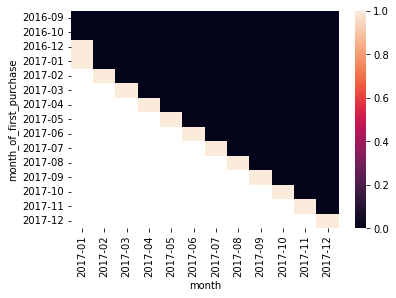

In [306]:
ax = sns.heatmap(retention)

In [307]:
retention

month,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12
month_of_first_purchase,,,,,,,,,,,,
2016-09,0.0,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016-10,0.0,0.000,0.000000,0.003448,0.000000,0.000000,0.003448,0.000000,0.003448,0.000000,0.003448,0.000000
2016-12,1.0,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017-01,1.0,0.004,0.002667,0.001333,0.004000,0.001333,0.004000,0.001333,0.001333,0.000000,0.004000,0.001333
2017-02,NaN,1.000,0.002384,0.002980,0.001192,0.004172,0.001192,0.002384,0.001788,0.000596,0.001788,0.001192
2017-03,NaN,NaN,1.000000,0.005056,0.003501,0.003890,0.003501,0.001556,0.001556,0.003112,0.003501,0.000778
2017-04,NaN,NaN,NaN,1.000000,0.006022,0.002151,0.001720,0.003011,0.002581,0.003441,0.003011,0.003011
2017-05,NaN,NaN,NaN,NaN,1.000000,0.004802,0.004802,0.003955,0.003107,0.003390,0.004237,0.001412
2017-06,NaN,NaN,NaN,NaN,NaN,1.000000,0.004513,0.003546,0.003868,0.002579,0.003868,0.003546


## Answer to Question 5
## Ответ на Вопрос 5

The max retention is in "2017-09" cohort in the 3rd month<br>
Максимальный ретеншн в когорте "2017-09" на третий месяц


## Question 6

R (Recency) - время от последней покупки пользователя до текущей даты, <br>
F (Frequency) - суммарное количество покупок у пользователя за всё время, <br>
M (Monetary)- сумма покупок за всё время <br>

In [319]:
from datetime import date
today=pd.to_datetime(date.today().strftime('%Y-%m-%d %H:%M:%S'))

Возьмем весь датасет для работы по совершенным покупкам

In [320]:
rfm_frame=purchase.copy()
rfm_frame=rfm_frame.merge(customers.drop(['customer_zip_code_prefix',
                                        'customer_city',
                                         'customer_state'], axis=1),
                                        left_on='customer_id', right_on='customer_id')
recency_frame=rfm_frame.copy()
frequency_frame=rfm_frame.copy()
monetary_frame=rfm_frame.copy()

Let's calculate recency<br>
Посчитаем recency

In [321]:
recency_frame['days_last_order']=recency_frame['purchase_timestamp'].apply(\
                                lambda x:(today-x).days)

In [322]:
recency_frame.head(2)

,order_id,customer_id,order_status,purchase_timestamp,approved_at,delivered_carrier_date,delivered_customer_date,estimated_delivery_date,customer_unique_id,days_last_order
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,1710
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,1415


Let's perform rebasing to avoid having large recency dates<br>
Проведем ребейсинг, чтобы избежать больших значений в днях<br>

In [323]:
most_recent_purchase=recency_frame['days_last_order'].min()

In [324]:
recency_frame['days_last_order']=recency_frame['days_last_order']-most_recent_purchase
recency_frame=recency_frame.groupby(['customer_unique_id'],as_index=False).\
                                            agg({'days_last_order':'min'})
recency_frame=recency_frame.rename(columns={'days_last_order':'recency'}).\
                                   sort_values('customer_unique_id',ascending=True)

In [325]:
recency_frame.head(2)

,customer_unique_id,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,116
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119


Now it is time for frequency<br>
Время frequency

In [326]:
frequency_frame=frequency_frame.groupby(['customer_unique_id'],as_index=False).count()\
[['customer_unique_id','order_id']].rename(columns={'order_id':'frequency'}).\
sort_values('customer_unique_id', ascending=True)

In [327]:
frequency_frame.head(2)

,customer_unique_id,frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1


Finally, monetary<br>
Наконец, monetary

In [328]:
monetary_frame=monetary_frame.merge(order_items[['price','freight_value','order_id']],
                                   on='order_id')

Для расчета monetary будем брать сумму "price" и "freight value" за отсутствием других денежных значений

In [329]:
monetary_frame['value']=monetary_frame['price']+monetary_frame['freight_value']
monetary_frame=monetary_frame.groupby(['customer_unique_id'],as_index=False).sum()\
                [['customer_unique_id','value']].rename(columns={'value':'monetary'})

In [330]:
rfm=recency_frame.merge(frequency_frame,on='customer_unique_id').\
                  merge(monetary_frame,on='customer_unique_id')

In [331]:
rfm.head(2)

,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,27.19


Построим грейдинг так, чтобы в каждый бакет по recency и monetary попадало 20% наблюдений.<br>
<br>Из-за очень большой доли заказчиков, которые сделали только 1 заказ, разделим frequency на 2 грейда: 1 - совершена только 1 покупка и 2 - совершено больше 1 покупки

In [332]:
quantiles_rm=rfm[['recency','monetary']].quantile([0.2,0.4,0.6,0.8]).to_dict()
pd.DataFrame(quantiles_rm)

,recency,monetary
0.2,98.0,55.36
0.4,182.0,87.50
0.6,273.0,133.05
0.8,388.0,209.11


Переведем квантили в скоры:

In [333]:
def r_score(x):
    if x <= quantiles_rm['recency'][.2]:
        return 5
    elif x <= quantiles_rm['recency'][.4]:
        return 4
    elif x <= quantiles_rm['recency'][.6]:
        return 3
    elif x <= quantiles_rm['recency'][.8]:
        return 2
    else:
        return 1

def m_score(x):
    if x <= quantiles_rm['monetary'][.2]:
        return 1
    elif x <= quantiles_rm['monetary'][.4]:
        return 2
    elif x <= quantiles_rm['monetary'][.6]:
        return 3
    elif x <= quantiles_rm['monetary'][.8]:
        return 4
    else:
        return 5

def f_score(x):
    if x<=1:
        return 1
    else:
        return 2   

In [334]:
rfm['R'] = rfm['recency'].apply(lambda x: r_score(x))
rfm['F'] = rfm['frequency'].apply(lambda x: f_score(x))
rfm['M'] = rfm['monetary'].apply(lambda x: m_score(x))

In [335]:
rfm['RFM Score'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)
rfm.head()

,customer_unique_id,recency,frequency,monetary,R,F,M,RFM Score
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,141.90,4,1,4,414
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,27.19,4,1,1,411
2,0000f46a3911fa3c0805444483337064,542,1,86.22,1,1,2,112
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,43.62,2,1,1,211
4,0004aac84e0df4da2b147fca70cf8255,293,1,196.89,2,1,4,214


Теперь разделим по группам клиентов в зависимости от RFM-скора:

In [338]:
segt_map = {
    '[1-2]1[1-2]':'old one-time buyers - minor',
    '[1-2]2[1-2]':'old frequent buyers - minor',
    '[1-2]1[3-5]':'old one-time buyers - major',
    '[1-2]2[3-5]':'old frequent buyers - major',
    '[3-4]1[1-2]':'research',
    '[3-4]2[1-2]':'need attention',
    '[3-4]1[3-5]':'potential',
    '[3-4]2[3-5]':'at risk',
    '51[1-3]':'recent one-time buyers',
    '52[1-3]':'promising',
    '51[4-5]': 'need attention',
    '52[4-5]':'best in class'
}

rfm['segment'] = rfm['R'].map(str) + rfm['F'].map(str)+rfm['M'].map(str)
rfm['segment'] = rfm['segment'].replace(segt_map, regex=True)


**'old one-time buyers - minor'** - made single purchase long ago, didn't spend much / сделали единственную покупку давно, не потратили много <br>
<br>
**'old frequent buyers - minor'** - made more than one purchase long ago, didn't spend much / сделали несколько покупком давно, не потратили много <br>
<br>
**'old one-time buyers - major'** - made single purchase long ago, spent significantly / сделали единственную покупку давно, потратили много<br>
<br>
**'old frequent buyers - major'** - made more than one purchase long ago, spent significantly / сделали несколько покупок давно, потратили много<br>
<br>
**'recent one-time buyers'** - made single purchase recently, didn't spend much / сделали единственную покупку недавно, не потратили много<br>
<br> 
**'research'** - small recent spontaneous purchase, research on the group is needed / маленькие недавние спонтанные покупки, нужно лучше понять группу<br>
<br>
**'need attention'** - we should attract them to buy again / нужно привлечать их назад  - купили недавно, разовая покупка, но потратили много<br>
<br>
**'at risk'** - frequent buyers in the nearest past, spent on average / регулярные покупатели в недавнем прошлом, тратят средне/максимум <br>
<br>
**'promising'** - recent purchases, buy frequently,don't spend much / недавние покупки,  покупают часто, не тратят много<br>
<br>
**'need attention'** - recently made expensive purchase, we should hold them /недавно сделали дорогую покупку, нужно удержать их<br>
<br>
**'best in class'** - top buyers / топ покупатели<br>


In [339]:
rfm.head(2)

,customer_unique_id,recency,frequency,monetary,R,F,M,RFM Score,segment
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,141.90,4,1,4,414,potential
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,27.19,4,1,1,411,research


In [340]:
rfm['segment'].unique()

array(['potential', 'research', 'old one-time buyers - minor',
       'old one-time buyers - major', 'recent one-time buyers',
       'need attention', 'at risk', 'promising',
       'old frequent buyers - major', 'best in class',
       'old frequent buyers - minor'], dtype=object)

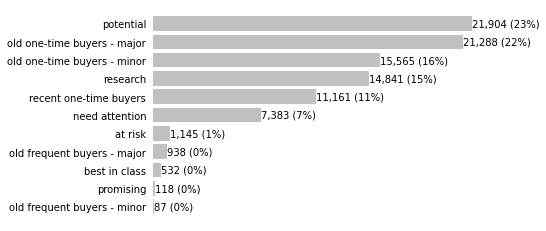

In [341]:
segments_counts = rfm['segment'].value_counts().sort_values(ascending=True)
fig, ax = plt.subplots()
bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)
for i, bar in enumerate(bars):
        value = bar.get_width()
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()